In [20]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [3]:
BASE_DIR = os.getcwd()
LARGE_DATASET_DIR = os.path.join(BASE_DIR, 'large_dataset')
TRAIN_DIR = os.path.join(LARGE_DATASET_DIR, 'train')
TEST_DIR = os.path.join(LARGE_DATASET_DIR, 'test')

In [4]:
train_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
    subset='training'
)

Found 5922 images belonging to 2 classes.


In [5]:
validation_batch = ImageDataGenerator(rescale=1/255, validation_split=0.2).flow_from_directory(
    TRAIN_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
    subset='validation'
)

Found 1480 images belonging to 2 classes.


In [6]:
test_batch = ImageDataGenerator(rescale=1/255).flow_from_directory(
    TEST_DIR, 
    color_mode='grayscale', 
    batch_size=32,
    target_size=(256, 256),
)

Found 602 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                2097184   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 2,112,034
Trainable params: 2,112,034
Non-trainable params: 0
______________________________________________

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(train_batch, validation_data=validation_batch, batch_size=32, epochs=15)

Epoch 1/15
186/186 [==============================] - 37s 194ms/step - loss: 0.3185 - accuracy: 0.8752 - val_loss: 0.2172 - val_accuracy: 0.8973
Epoch 2/15
186/186 [==============================] - 34s 183ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.2607 - val_accuracy: 0.9095
Epoch 3/15
186/186 [==============================] - 36s 191ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0288 - val_accuracy: 0.9939
Epoch 4/15
186/186 [==============================] - 35s 190ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.1172 - val_accuracy: 0.9797
Epoch 5/15
186/186 [==============================] - 36s 194ms/step - loss: 1.0102e-04 - accuracy: 1.0000 - val_loss: 0.0818 - val_accuracy: 0.9804
Epoch 6/15
186/186 [==============================] - 35s 187ms/step - loss: 1.4166e-05 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9797
Epoch 7/15
186/186 [==============================] - 35s 188ms/step - loss: 9.9725e-06 - accuracy: 1.0000 - val_loss: 0.0

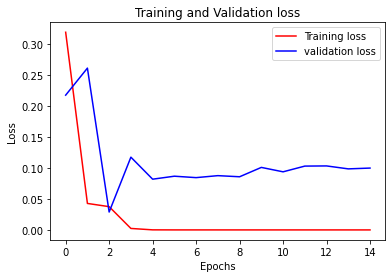

In [21]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,15)
plt.plot(loss_train, 'r', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

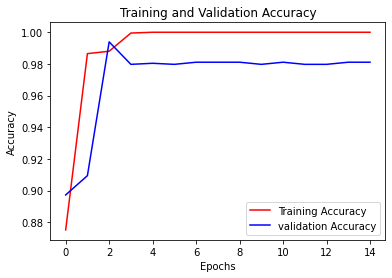

In [22]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
plt.plot(acc_train, 'r', label='Training Accuracy')
plt.plot(acc_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
predicted = model.evaluate(test_batch)

19/19 [==============================] - 9s 502ms/step - loss: 0.0491 - accuracy: 0.9950


In [24]:
predicted

[0.049136996269226074, 0.9950166344642639]